In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import anndata as ad 


In [2]:
Cell_tagMulti = "/Users/apple/Desktop/KB/data/Cell_tag-Cell_tag_multi_integrated/Seurat_method/cellTag_test_multi_Seurat_clone_id.h5ad"
Cell_tag = "/Users/apple/Desktop/KB/data/Cell_tag-Cell_tag_multi_integrated/Seurat_method/cellTag_train_tag_Seurat.h5ad"
# load once
adata_Cell_tagMulti = ad.read_h5ad(Cell_tagMulti)
adata_Cell_tag = ad.read_h5ad(Cell_tag)

In [3]:
adata_Cell_tag.obs["clone_id"]

HF1_AAAGCAATCCAGATCA_5     424.0
HF1_AACACGTAGAACAACT_5     195.0
HF1_AAACCTGAGAGCAATT_5     647.0
HF1_AACACGTTCGAGGTAG_5     487.0
HF1_AACCATGGTCTAGAGG_5     652.0
                           ...  
HF2_TTCTTAGAGCGACGTA_4    2657.0
HF2_TTCCCAGGTGATGATA_4    2367.0
HF2_TTCTCCTCATGAACCT_4    2490.0
HF2_TTGGAACCAAGAAAGG_4    2764.0
HF2_TTGTAGGGTCAGAGGT_4    2294.0
Name: clone_id, Length: 6534, dtype: float64

In [4]:
train_embed_001 = np.load("/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi/feat_celltagMulti_lambda001_unlab5_bs50_Seurat/train_embedding.npy")
test_embed_001 = np.load("/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi/feat_celltagMulti_lambda001_unlab5_bs50_Seurat/test_embedding.npy")

train_embed_re_001 = np.load("/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi/feat_celltagMulti_lambda001_unlab15_bs250_Seurat_reverse/train_embedding.npy")
test_embed_re_001 = np.load("/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi/feat_celltagMulti_lambda001_unlab15_bs250_Seurat_reverse/test_embedding.npy")

train_embed_re_1 = np.load("/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi/feat_celltagMulti_lambda1_unlab15_bs250_Seurat_reverse/train_embedding.npy")
test_embed_re_1 = np.load("/Users/apple/Desktop/KB/data/feat_LCL_2025/Cell_tag-Cell_tag_multi/feat_celltagMulti_lambda1_unlab15_bs250_Seurat_reverse/test_embedding.npy")

In [6]:
def plot_top5_umap(emb, labels, title, n_neighbors=15, min_dist=0.3, random_state=42):
    """
    emb: np.ndarray (n_cells, n_features) – your high-dim embeddings
    labels: 1D array-like of clone_id (ints or floats; NaN/-1 treated as 'other')
    """
    labels = pd.Series(labels).copy()

    # Treat missing as 'other'
    # If you already use -1 for unlabeled, this preserves it.
    labels_clean = labels.copy()
    labels_clean = labels_clean.where(~labels_clean.isna(), -1)

    # Top-5 clone_ids by count, excluding unlabeled (-1)
    top_ids = (
        labels_clean[labels_clean != -1]
        .value_counts()
        .head(5)
        .index.tolist()
    )

    # 2D UMAP
    reducer = umap.UMAP(
        n_neighbors=n_neighbors, 
        min_dist=min_dist, 
        metric='euclidean', 
        random_state=random_state
    )
    emb2d = reducer.fit_transform(emb)

    # Masks
    is_top = labels_clean.isin(top_ids)
    is_other = ~is_top

    # Plot
    plt.figure(figsize=(7, 6))
    # Background first: gray
    plt.scatter(
        emb2d[is_other, 0], emb2d[is_other, 1],
        c="lightgray", s=6, alpha=0.5, linewidths=0, label="other"
    )

    # Use default matplotlib color cycle for the 5 groups
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, cid in enumerate(top_ids):
        mask = labels_clean == cid
        plt.scatter(
            emb2d[mask, 0], emb2d[mask, 1],
            s=10, alpha=0.9, linewidths=0,
            label=f"clone_id {cid}",
            c=color_cycle[i % len(color_cycle)]
        )

    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.legend(markerscale=1.2, frameon=True, fontsize=9)
    plt.tight_layout()
    plt.show()



In [7]:
adata_Cell_tagMulti_labels = adata_Cell_tagMulti.obs["clone_id"].to_numpy()  # keep user’s dtype; NaN ok
adata_Cell_tag_labels  = adata_Cell_tag.obs["clone_id"].to_numpy()



/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


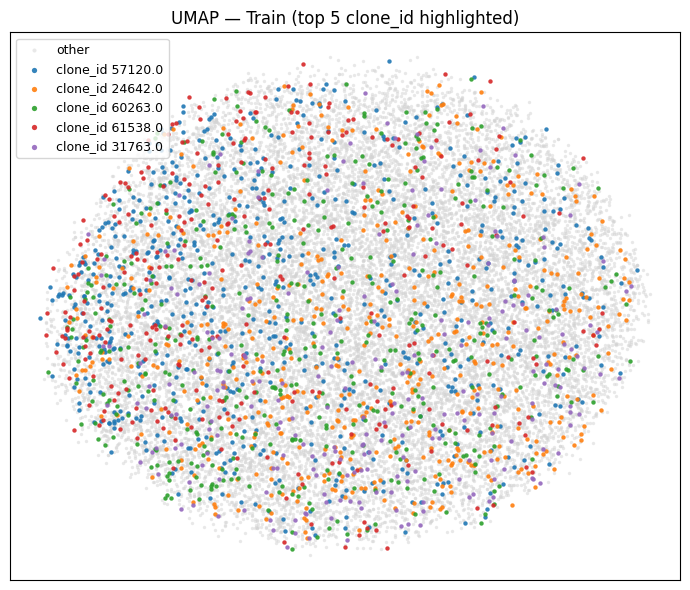

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


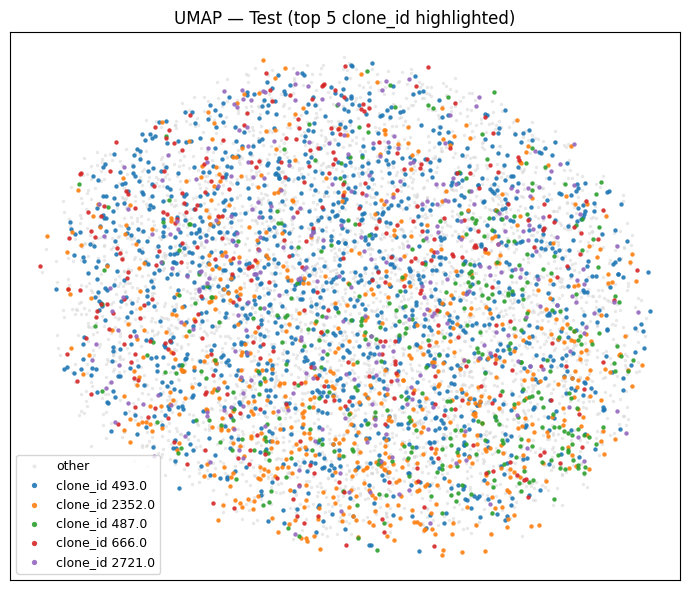

In [8]:
plot_top5_umap(train_embed_re_1, adata_Cell_tagMulti_labels, title="UMAP — Train (top 5 clone_id highlighted)")
plot_top5_umap(test_embed_re_1,  adata_Cell_tag_labels,  title="UMAP — Test (top 5 clone_id highlighted)")

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


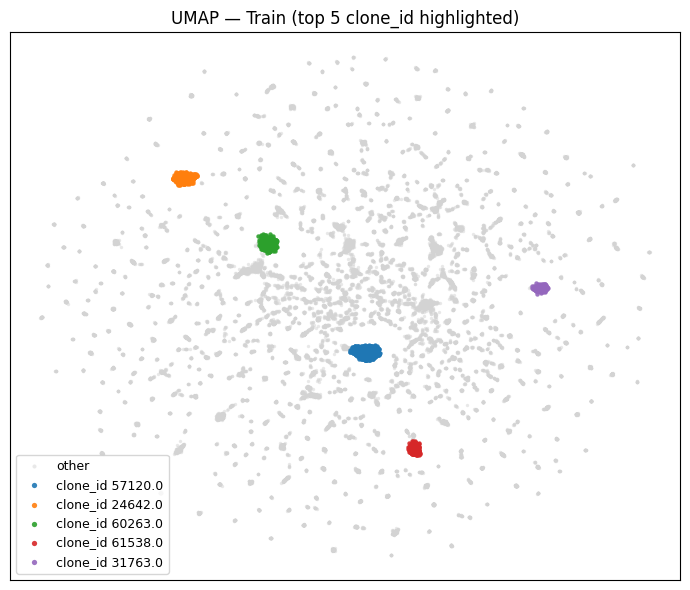

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


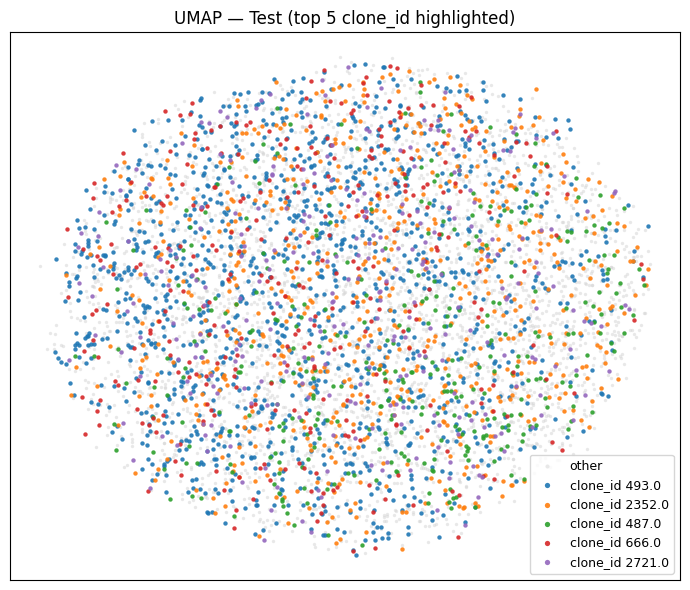

In [9]:
plot_top5_umap(train_embed_re_001, adata_Cell_tagMulti_labels, title="UMAP — Train (top 5 clone_id highlighted)")
plot_top5_umap(test_embed_re_001,  adata_Cell_tag_labels,  title="UMAP — Test (top 5 clone_id highlighted)")

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


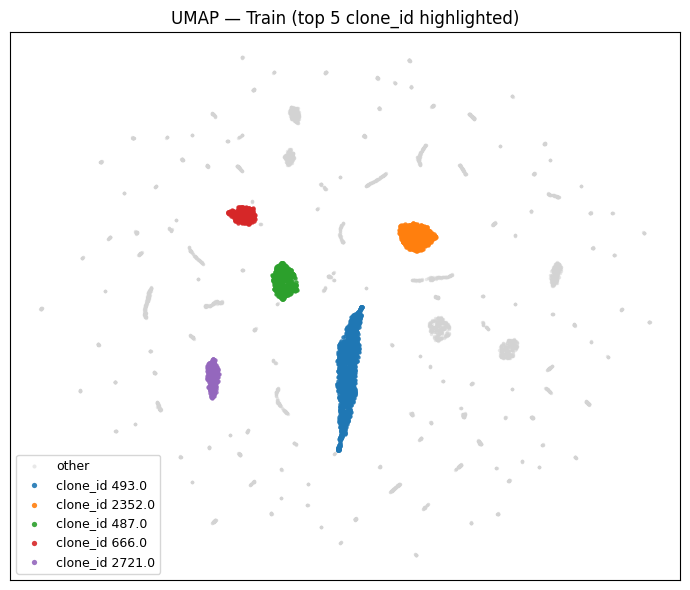

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


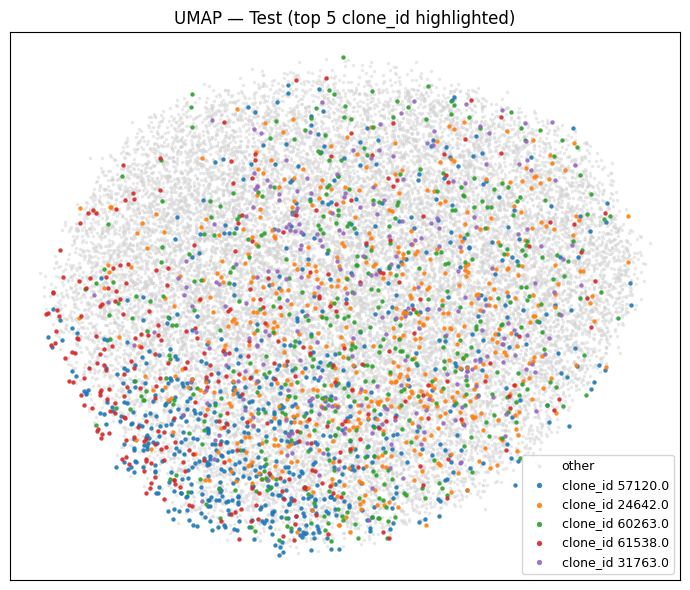

In [10]:
# ----- Plot -----
plot_top5_umap(train_embed_001, adata_Cell_tag_labels, title="UMAP — Train (top 5 clone_id highlighted)")
plot_top5_umap(test_embed_001, adata_Cell_tagMulti_labels,  title="UMAP — Test (top 5 clone_id highlighted)")

In [11]:
def plot_train_test_umap(train_emb, test_emb, n_neighbors=15, min_dist=0.3, random_state=42):
    """
    Concatenate train & test embeddings, run UMAP, and color by 'train'/'test'.
    
    Parameters
    ----------
    train_emb : np.ndarray
        Train embeddings (n_train, n_features)
    test_emb : np.ndarray
        Test embeddings (n_test, n_features)
    n_neighbors : int
        UMAP n_neighbors parameter
    min_dist : float
        UMAP min_dist parameter
    random_state : int
        Random seed for reproducibility
    """
    # 1) Combine embeddings
    emb_combined = np.vstack([train_emb, test_emb])

    # 2) Create labels
    split_labels = np.array(
        ["train"] * train_emb.shape[0] + ["test"] * test_emb.shape[0]
    )

    # 3) Run UMAP
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric='euclidean',
        random_state=random_state
    )
    emb2d = reducer.fit_transform(emb_combined)

    # 4) Plot
    plt.figure(figsize=(7, 6))
    for group, color in zip(["train", "test"], ["tab:blue", "tab:orange"]):
        mask = split_labels == group
        plt.scatter(
            emb2d[mask, 0], emb2d[mask, 1],
            c=color, label=group, s=8, alpha=0.8
        )

    plt.title("UMAP — Train vs Test")
    plt.xticks([]); plt.yticks([])
    plt.legend(markerscale=1.5, frameon=True)
    plt.tight_layout()
    plt.show()



/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


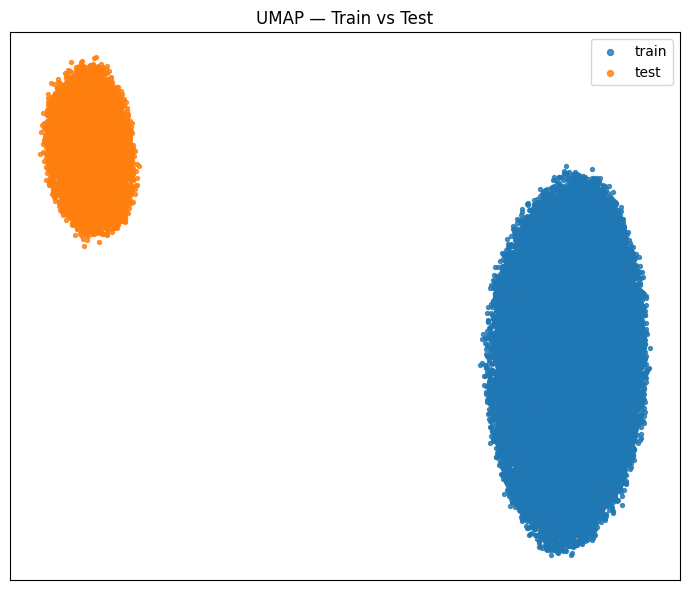

In [12]:
plot_train_test_umap(train_embed_re_1, test_embed_re_1)

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


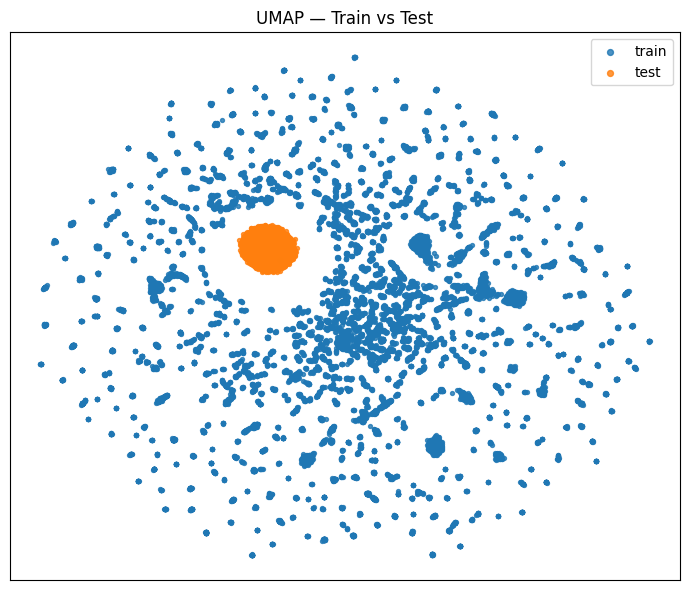

In [13]:
plot_train_test_umap(train_embed_re_001, test_embed_re_001)

/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


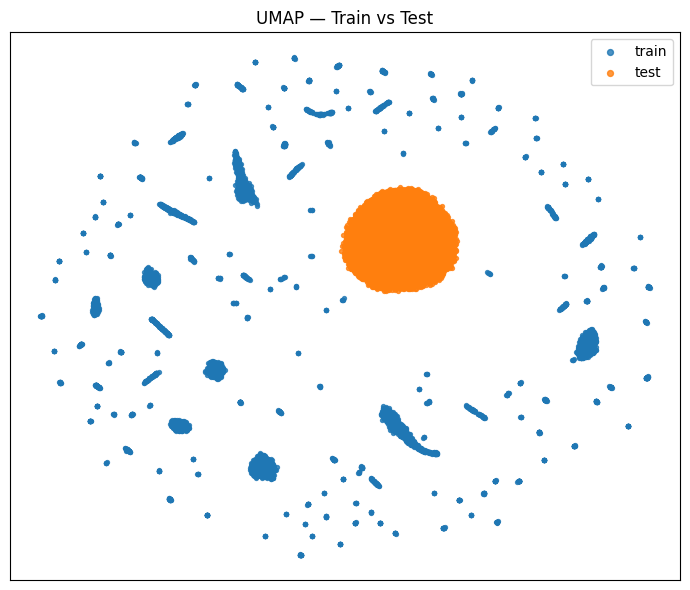

In [14]:
plot_train_test_umap(train_embed_001, test_embed_001)